In [79]:
from sklearn.datasets import load_digits #import the dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### Load + Visualize MNIST Dataset

[[ 0.  0.  9.  9.  4.  0.  0.  0.]
 [ 0.  0. 15. 15. 14. 12.  0.  0.]
 [ 0.  3. 10.  1.  0. 12.  5.  0.]
 [ 0.  5.  8.  0.  0.  8.  6.  0.]
 [ 0.  8.  8.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0. 10.  6.  0.]
 [ 0.  4. 13.  4.  6. 13.  0.  0.]
 [ 0.  0.  6. 16. 14.  3.  0.  0.]]
[ 0.  0.  9.  9.  4.  0.  0.  0.  0.  0. 15. 15. 14. 12.  0.  0.  0.  3.
 10.  1.  0. 12.  5.  0.  0.  5.  8.  0.  0.  8.  6.  0.  0.  8.  8.  0.
  0.  8.  8.  0.  0.  5.  8.  0.  0. 10.  6.  0.  0.  4. 13.  4.  6. 13.
  0.  0.  0.  0.  6. 16. 14.  3.  0.  0.]


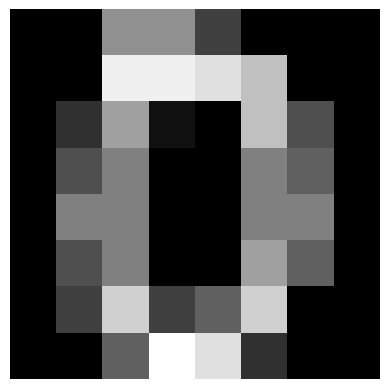

In [80]:
digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

example = 1 
#means that we have 64 pixels in an 8 by 8 manner 
#smaller than the mnist with 28 x 28 pixels 


# Plot some sample digits
# plt.figure(figsize=(10, 6))
# for i in range(10):
#     plt.subplot(2, 5, i + 1)
#     plt.imshow(digits.images[i], cmap='gray')
#     plt.title(f"Label: {digits.target[i]}")
#     plt.axis('off')
image = X_train[example].reshape(8,8)
#see they are different values since reshape makes a new copy
print(image)
print(X_train[example])
#image[0][0] = 2
#tried to modify the image and saw that most likely the image brightness 
#is represented in comparison. If a rogue pixel is 100, then all else with pale in comparison

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

### Scaling dataset features using Standard Scalar

Sample 1 is now normalized. Mean is 0 and standard deviation of brightness is 1.
[ 0.         -0.34169755  0.78471641 -0.65860017 -1.84460249 -1.03722581
 -0.40623424 -0.13101874 -0.06103492 -0.61725402  0.8589375   0.75430467
  0.76199765  0.60700536 -0.52465505 -0.13336005 -0.04991522  0.12851911
  0.03778099 -1.04767677 -1.16010978  0.65736168  0.96852751 -0.11409248
 -0.03733267  0.86365151 -0.15567903 -1.49945054 -1.60835913  0.07651178
  0.98733438 -0.04573894  0.          1.67384566  0.07355384 -1.44495478
 -1.74526375 -0.10676512  1.45911053  0.         -0.06519029  1.16537582
  0.17429724 -1.13725613 -1.23504336  0.30352474  0.58424608 -0.09403434
 -0.03963009  1.84547567  0.96531158 -1.07225551 -0.66033986  0.68917912
 -0.76379714 -0.21608405 -0.02638899 -0.30677646  0.08503346  0.89164719
  0.43903596 -0.64451929 -0.50623083 -0.19710003]


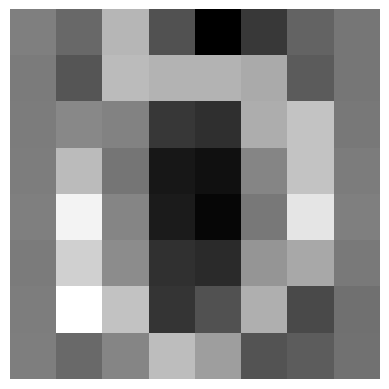

In [81]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Sample 1 is now normalized. Mean is 0 and standard deviation of brightness is 1.")
print(X_train[example])

image = X_train[example].reshape(8,8)
#image[0][0] = 2
#tried to modify the image and saw that most likely the image brightness 
#is represented in comparison. If a rogue pixel is 100, then all else with pale in comparison

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

### One Hot Encoding 

In [82]:
#the idea here is just to use a bitmap to encode each category 
#for example, 100 means the 3rd category. 
#then also in the end the neural network should output the probabilities of each encoding 
#in our example. the index of the predictions is the number it is 

def hot(y):
    print(y)
    hot = [[int(bit) for bit in bin(2**val)[2:].zfill(10)] for val in y]
    return hot 

print(hot(y_train)[:10])

[6 0 0 ... 2 7 1]
[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]


### Different Activation Functions

In [92]:
#functions 

def sigmoid(z):
    bottom = 1 + np.exp(-z)
    return 1/bottom 

def relu(z):
    if z < 0:
        return 0
    return z 

def tanh(z):
    return np.tanh(z)

#derivatives 
    
def d_sigmoid(z):
    return sigmoid(z) * (1- sigmoid(z))
    
def d_relu(z):
    if z < 0:
        return 0
    return 1
    
def d_tanh(z):
    return 1 - (tanh(z) ** 2)

0.7310585786300049

In [200]:
def neural(X, y, activation, d_activation, train = True, weights = None, lr = 0.0001, epoch = 100):
    #train determines if you do backwards propagation and improve as a result 
    
    activation = np.vectorize(activation)
    d_activation = np.vectorize(activation)
    
    y = np.array(hot(y))
    print("y is actually 1430 features 10 predictions ", y.shape)
    
    #forward pass start 
    #each row in X represents an image. 
    #assumed that X would in # of samples x 64 pixels 
    
    w1 = np.random.rand(64, 30)
    b1 = np.random.rand(1, 30) #can numpy broadcast this into the len of X? 
    
    w2 = np.random.rand(30, 10)
    b2 = np.random.rand(1, 10) #numpy broadcast this into len of X 
    
    if not train and weights: #when not training, and have weights pass the weights and start testing 
        w1, b1, w2, b2 = weights
    
    #the theory is that we apply 30 weights to each neuron 
    #z11 = x1 * w1,1 + x2 * w1,2 + x3 * w1,3 .... x64 * w1,64
    #z12 = x1 * w2,1 + x2 * w2,2 + x3 * w2,3 .... 
    
    #then each x from X will go through the same weights 
    
    for _ in range(epoch):
        print("round: ", _)
    
        z1 = X @ w1 + b1 
        #print("z1", z1.shape)
        z1_active = activation(z1) #element wise 
        #print("z1_active", z1_active.shape)

        z2 = z1_active @ w2 + b2 
        #print("z2", z2.shape)
        z2_active = activation(z2)
        #print("z2_active", z2_active.shape)

        #forward pass end. find the error 
        error = np.square(z2_active - y)
        #print("error", error.shape)

        pred = np.array([np.argmax(row) for row in z2_active])
        #print("pred", pred.shape)

        #only if training do we go through with back propagation passes 
        if train: 
            #back propagation pass 
            dE_dyhat = 2 * (z2_active - y)
            dyhat_dz2 = d_activation(z2_active)

            dz2_dw2 = z1_active.T
            dE_db = (dE_dyhat * dyhat_dz2) #since it is just 1 
            dE_dw = dz2_dw2 @ (dE_db)

            #update 1st weight + bias 
            dz2_dA1 = w2.T
            
            w2 = w2 - lr * dE_dw
            b2 = b2 - lr * dE_db 


            #back propagation pass 
            dA1_dz1 = d_activation(z1_active)
            dz1_dw1 = X.T

            #print("my shape isss ", (dE_dyhat * dyhat_dz2).shape)
            #print("other shape isss", dz2_dA1.T.shape)
            dE_db = ((dE_dyhat * dyhat_dz2) @ (dz2_dA1)) * dA1_dz1
            
            #print("last shape is ", dE_db.shape)
            #print("X shape is", X.shape)
            dE_dw = dz1_dw1 @ (dE_db)


            #update 2nd weight + bias 
            w1 = w1 - lr * dE_dw
            b1 = b1 - lr * dE_db

    return (pred, (w1, b1, w2, b2)) #activation and the error in the activations 
    

### Accuracy Test 

In [203]:
results_1 = neural(X_train, y_train, tanh, d_tanh, train = False, weights = None, lr = 0.001, epoch = 1)

results_100 = neural(X_train, y_train, tanh, d_tanh, train = True, weights = None, lr = 0.01, epoch = 20)
#pass in the weights to test 
#neural(X_test, y_test, sigmoid, d_sigmoid, train = False, weights = None, lr = 0.0001, epoch = 100)

[6 0 0 ... 2 7 1]
y is actually 1430 features 10 predictions  (1437, 10)
round:  0
[6 0 0 ... 2 7 1]
y is actually 1430 features 10 predictions  (1437, 10)
round:  0
round:  1
round:  2
round:  3
round:  4
round:  5
round:  6
round:  7
round:  8
round:  9
round:  10
round:  11
round:  12
round:  13
round:  14
round:  15
round:  16
round:  17
round:  18
round:  19


In [204]:
num_correct_1 = np.sum(y_train == results_1[0])
num_correct_100 = np.sum(y_train == results_100[0])
print("no training: ", num_correct_1/len(y_train))
print("training: ", num_correct_100/len(y_train))

no training:  0.14683368128044538
training:  0.10368823938761308
